In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from time import time

Opening Data..

In [3]:
PATH = "D:/Program Files (x86)/Jupyter Projects/"
filepath = PATH + "daily-minimum-temperatures-in-me.csv"
df = pd.read_csv(filepath)
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


Preprocessing...

In [4]:
df.columns = ['Date','Daily Min Temp']
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])
df.drop(columns=['Date'],inplace=True)
df

,Daily Min Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14
1990-12-28,13.6
1990-12-29,13.5


In [5]:
df['Daily Min Temp'] = pd.to_numeric(df['Daily Min Temp'],errors='coerce')

In [6]:
df['Daily Min Temp'] = df['Daily Min Temp'].fillna(df['Daily Min Temp'].rolling(7).mean())

In [7]:
df['Daily Min Temp'] = df['Daily Min Temp'].fillna(method="ffill")

In [8]:
df['Daily Min Temp'].sort_values()

Date
1982-06-05     0.0
1983-07-24     0.0
1985-07-24     0.3
1985-07-23     0.3
1989-06-28     0.5
              ... 
1981-01-18    24.8
1981-01-15    25.0
1981-02-09    25.0
1982-01-20    25.2
1982-02-15    26.3
Name: Daily Min Temp, Length: 3650, dtype: float64

Plotting Time Series...

In [9]:
import plotly.express as px

fig = px.line(df,x=df.index, y='Daily Min Temp', title='Daily Minimum Temperatures (1981-1990)')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

Train-Test Splits...

In [10]:
train = df[:'1989']
test = df['1990':]

Using Auto-Arima...

In [28]:
import pmdarima

arima_model = pmdarima.auto_arima(train, seasonal=True, m=12, start_P=1, max_P=3, 
                                  start_Q=3, max_Q=4, max_D=2, max_order=8, test= 'adf', error_action='ignore', 
                                  suppress_warnings=True, stepwise=True, trace=True)

arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,3)[12] intercept   : AIC=inf, Time=42.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=18571.792, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=15559.708, Time=1.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=16418.958, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=25568.841, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=15575.378, Time=0.21 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=15551.276, Time=6.12 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=15545.402, Time=12.23 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=24.62 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=14.04 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=17090.581, Time=10.91 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=15539.030, Time=16.72 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=15541.667, Time=8.31 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=17.85 sec
 ARIMA(2,0,0)(2,0,1)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3285
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -7564.131
Date:                Fri, 10 Jun 2022   AIC                          15140.262
Time:                        11:36:11   BIC                          15176.845
Sample:                             0   HQIC                         15153.360
                               - 3285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0562      0.019      2.967      0.003       0.019       0.093
ar.L1          1.4821      0.019     76.094      0.000       1.444       1.520
ar.L2         -0.6126      0.028    -21.853      0.000      -0.668      -0.558
ar.L3          0.1256      0.019      6.721      0.000       0.089       0.162
ma.L1         -0.8931      0.012    -72.128      0.000      -0.917      -0.869
sigma2         5.8525      0.136     43.068      0.000       5.586       6.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.26
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

testmod = SARIMAX(train,order=(3,0,1),seasonal_order=(0,0,0,12))
testresult = testmod.fit()
testresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Daily Min Temp   No. Observations:                 3285
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -7570.909
Date:                Fri, 10 Jun 2022   AIC                          15151.817
Time:                        20:27:50   BIC                          15182.303
Sample:                             0   HQIC                         15162.733
                               - 3285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4928      0.018     81.098      0.000       1.457       1.529
ar.L2         -0.6178      0.028    -22.151      0.000      -0.672      -0.563
ar.L3          0.1247      0.019      6.696      0.000       0.088       0.161
ma.L1         -0.9006      0.010    -86.170      0.000      -0.921      -0.880
sigma2         5.8716      0.137     42.936      0.000       5.604       6.140
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.67
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Using SARIMAX(3,0,1)x(0,0,0,12) for rolling forecast....

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

rolling_predictions = test.copy()
rolling_predictions['Predictions'] = np.nan
for train_end in test.index:
    rolling_train = df[:train_end-timedelta(days=1)]
    model = SARIMAX(rolling_train, order=(3, 0, 1), seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions['Predictions'][train_end] = pred

In [44]:
rolling_predictions

,Daily Min Temp,Predictions
Date,,
1990-01-01,14.8,12.867302
1990-01-02,13.3,14.303351
1990-01-03,15.6,13.199307
1990-01-04,14.5,14.754685
1990-01-05,14.3,13.897959
...,...,...
1990-12-27,14.0,14.255847
1990-12-28,13.6,13.708740
1990-12-29,13.5,13.574554


Plotting the test data vs forecast...

Text(0, 0.5, 'Daily Min Temp')

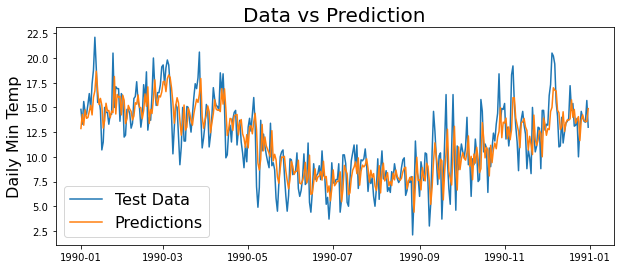

In [46]:
plt.figure(figsize=(10,4))

plt.plot(rolling_predictions)

plt.legend(('Test Data', 'Predictions'), fontsize=16)

plt.title('Data vs Prediction', fontsize=20)
plt.ylabel('Daily Min Temp', fontsize=16)

Comparing Full Dataset to Rolling Predictions....

Text(0, 0.5, 'Daily Min Temp')

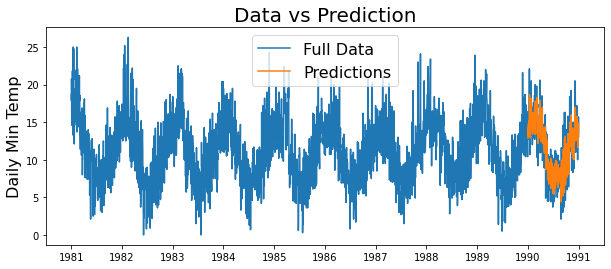

In [47]:
plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(rolling_predictions['Predictions'])

plt.legend(('Full Data', 'Predictions'), fontsize=16)

plt.title('Data vs Prediction', fontsize=20)
plt.ylabel('Daily Min Temp', fontsize=16)

Checking Residuals...

<AxesSubplot:xlabel='Date'>

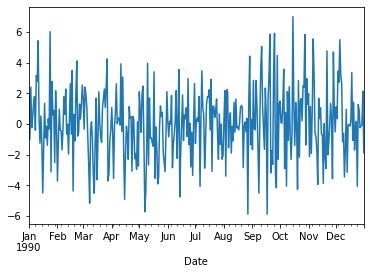

In [48]:
residuals = rolling_predictions['Daily Min Temp'] - rolling_predictions['Predictions']

residuals.plot()

In [52]:
residuals.describe()

count    365.000000
mean       0.035834
std        2.265796
min       -5.900366
25%       -1.341775
50%        0.045369
75%        1.407421
max        7.004019
dtype: float64

In [53]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(residuals)
print("p-value of Residuals of Daily Min Temp 1990-1991: {}".format(float(adf[1])))

p-value of Residuals of Daily Min Temp 1990-1991: 2.0626210091353546e-30


In [49]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2.262974227394941


In [50]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/rolling_predictions['Daily Min Temp'])),4))

Mean Absolute Percent Error: 0.1811
